In [14]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision

In [16]:
import set_data as sd

# load train set, test set

X_train, Y_train, X_test, Y_test, y_min, y_max, y_mean, y_std = sd.set_data("data/combined_total_data_3")

print(X_train.shape)
print(X_train, Y_train)
print(Y_train[0])


x_train = Variable(X_train)
y_train = Variable(Y_train)


[124957.793   125332.39    132447.77625 ... 209714.78025 261742.30675
 292399.655  ]
[-1.13230866 -1.12507744 -0.98772211 ...  0.50383923  1.50817799
  2.09998707]
torch.Size([265449, 28])
tensor([[-0.2896,  0.0843, -1.2990,  ...,  0.8849, -1.2998, -0.6544],
        [ 1.4671,  0.6977,  1.1269,  ...,  1.4760, -1.2998, -0.6544],
        [ 1.4671,  0.5159, -1.2990,  ..., -0.4904, -0.6064,  1.5278],
        ...,
        [-1.4607, -0.8017, -1.2990,  ...,  1.0554, -0.2596, -0.2180],
        [-0.2896, -1.3242, -1.2990,  ..., -0.2631, -1.4732, -0.2180],
        [ 0.8816, -0.6426,  0.7803,  ...,  1.3055,  0.2604,  1.5278]],
       dtype=torch.float64) tensor([[-1.1323],
        [-1.1251],
        [-0.9877],
        ...,
        [ 0.4079],
        [-2.2698],
        [-0.2207]], dtype=torch.float64)
tensor([-1.1323], dtype=torch.float64)


In [17]:
# regression model

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(28, 128) #input dim = 28, hidden = 128
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.drop2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64,10)
        self.drop3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(10, 1)
        

    def forward(self, x):
        a = F.relu(self.fc1(x))
        a = self.drop1(a)
        a = F.relu(self.fc2(a))
        a = self.drop2(a)
        a = F.relu(self.fc3(a))
        a = self.drop3(a)
        a = self.fc4(a)
        
        return a

In [18]:
# train



loss_graph = []

In [ ]:
epochs = 300
learningrate = 0.01

model = RegressionModel()
model.load_state_dict(torch.load('./lenna_m.pth'))
criterion = nn.SmoothL1Loss(size_average = True) 
optimizer = torch.optim.Adam(model.parameters(), lr=learningrate)

print('\nStart Training...\n')

for epoch in range(epochs+1):
    # forward pass
    pred_y = model(x_train.float())
    

    # compute and print loss
    loss = criterion(pred_y.double(), y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_graph.append(loss.item())
    
    if epoch % 10 == 0:
        print ('epoch [{}/{}], loss {}'.format(epoch, epochs, loss.item())) # or loss item
    

/nfs/home/meowpunch/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))



Start Training...

epoch [0/300], loss 0.11512054778359955
epoch [10/300], loss 0.12005181259973226
epoch [20/300], loss 0.11640847556005601
epoch [30/300], loss 0.11414825694478344
epoch [40/300], loss 0.1122312375810523
epoch [50/300], loss 0.11115776799597755
epoch [60/300], loss 0.11085334883729103
epoch [70/300], loss 0.10990944390618924
epoch [80/300], loss 0.10935046119333097
epoch [90/300], loss 0.10824091594802514
epoch [100/300], loss 0.1075859322848086
epoch [110/300], loss 0.1070629240109791
epoch [120/300], loss 0.10625146224997889
epoch [130/300], loss 0.10559119074374827
epoch [140/300], loss 0.10521012610996312
epoch [150/300], loss 0.10502643296031956
epoch [160/300], loss 0.10459803411380167
epoch [170/300], loss 0.10457420324456927
epoch [180/300], loss 0.10427457973783254
epoch [190/300], loss 0.10436796672317096
epoch [200/300], loss 0.10346956061880651


In [20]:
torch.save(model.state_dict(), "./lenna_m.pth")

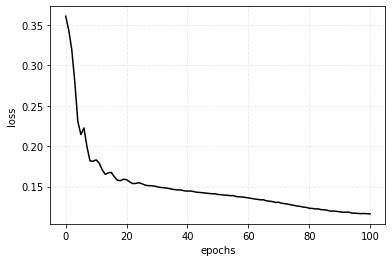

In [21]:
fig = plt.figure()
plt.plot(range(epochs+1), loss_graph, label = 'loss', color = 'black')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(linestyle = '--', color = 'lavender')
plt.show()

In [10]:
x_test = Variable(X_test)
y_test = Variable(Y_test)

model.eval()
y_pred = model(x_test.float())
after_train = criterion(y_pred.double(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.39574193042050365


In [11]:
x_test = Variable(X_test)
y_test = Variable(Y_test)
print(y_test)
criterion = nn.SmoothL1Loss(size_average = True) 

new_model= RegressionModel()
new_model.load_state_dict(torch.load('./lenna_m.pth'))
    
new_model.eval()

y_pred = new_model(x_test.float())
after_train = criterion(y_pred.double(), y_test) 
print('Test loss after Training' , after_train.item())

tensor([[-0.0682],
        [-0.0268],
        [ 1.6481],
        ...,
        [ 0.4937],
        [ 1.4850],
        [ 2.0692]], dtype=torch.float64)
Test loss after Training 0.39574193042050365


/nfs/home/meowpunch/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [13]:
def denormalize(data, d_min, d_max, d_mean, d_std):
    
    tmp_data = torch.empty([data.shape[0], data.shape[1]])
    
    for i in range(data.shape[0]):
        e = float(data[i])
        
        tmp_data[i] = (e*d_std + d_mean)

    return tmp_data

print(y_test)
print(y_pred)
print(float(y_pred[0]))
# print(y_test.float())
# print(y_pred[0])

dy_test = denormalize(y_test, y_min, y_max, y_mean, y_std)
dy_pred = denormalize(y_pred, y_min, y_max, y_mean, y_std)

print(dy_test)
print(dy_pred)



tensor([[-0.0682],
        [-0.0268],
        [ 1.6481],
        ...,
        [ 0.4937],
        [ 1.4850],
        [ 2.0692]], dtype=torch.float64)
tensor([[-0.2246],
        [ 0.2648],
        [ 1.3205],
        ...,
        [-0.8458],
        [-0.1367],
        [ 0.0344]], grad_fn=<AddmmBackward>)
-0.22463800013065338
tensor([[180228.8594],
        [182403.0312],
        [270300.9375],
        ...,
        [209714.7812],
        [261742.3125],
        [292399.6562]])
tensor([[172018.5781],
        [197702.6562],
        [253107.8906],
        ...,
        [139420.5156],
        [176632.7812],
        [185611.2188]])
